# Deep Learning-Based Generative Models

## Types of Generative Models, Generative vs. Discriminative

In machine learning, the distinction between generative and discriminative models lies in how they handle the data and what tasks they aim to solve:

**Generative Models:**

- Learn the joint probability distribution ( $P(X, Y)$ ) of the data.
- Aim to model how the data is generated, including both input features (X) and labels (Y).
- Once trained, generative models can be used to generate new data instances.
- Examples: Generative Adversarial Networks (GANs), Variational Autoencoders (VAEs), and Naive Bayes.

**Discriminative Models:**

- Learn the conditional probability ( $P(Y | X)$ ), which is the probability of the label ( Y ) given the input data ( X ).
- These models focus on classifying or predicting outputs based on the input features.
- Discriminative models are generally better for tasks like classification, where the goal is to make decisions based on the data.
- Examples: Logistic Regression, Support Vector Machines (SVMs), and Decision Trees.

**Key Differences:**

**Generative Models:**

- Focus on modeling the full data distribution ( P(X, Y) ).
- Can generate new data instances.
- Provide a deeper understanding of how the data was generated.

**Discriminative Models:**

- Focus on learning a boundary between different classes by directly modeling ( P(Y | X) ).
- Often more accurate for classification tasks since they directly aim to predict labels.

## Gaussian Mixture Models

A Gaussian Mixture Model (GMM) is a probabilistic model that assumes all the data points are generated from a mixture of several Gaussian distributions with unknown parameters. GMMs are often used for clustering, as they allow each cluster to have a different shape and size, unlike k-means clustering, where clusters are spherical.

![gmm](./images/dl1.png)

**How it works?**

Unlike K-Means, where the clustering process relies solely on the centroid and assigns each data point to one cluster, GMM uses a probabilistic approach. Here’s how GMM performs clustering:

1. Multiple Gaussians (Clusters): Each cluster is represented by a Gaussian distribution, and the data points are assigned probabilities of belonging to different clusters based on their distance from each Gaussian.
2. Parameters of a Gaussian: The core of GMM is made up of three main parameters for each Gaussian:
- Mean (μ): The center of the Gaussian distribution.
- Covariance (Σ): Describes the spread or shape of the cluster.
- Mixing Probability (π): Determines how dominant or likely each cluster is in the data.

The Gaussian mixture model assigns a probability to each data point $x_n$​ of belonging to a cluster. The probability of data point ​ coming from Gaussian cluster k is expressed as

$$P(z_{n}=k|x_{n})=\frac{\pi_{k}\cdot N(x_{n}|\mu_{k}, \sum_{k}) }{ \sum_{i=1}^{K} \pi_{i} \cdot N(x_{n}|\mu_{i}, \sum_{i})}$$

Where: $z_{n}=k$ is a latent variable indicating which Gaussian the point belongs to., 
$\pi_{k}$ is the mixing probability of the k-th Gaussian, 
$N(x_{n}|\mu_{k}, \sum_{k})$ is the Gaussian distribution with mean $\mu_{k}$​ and covariance Σk.

Next, we need to calculate the overall likelihood of observing a data point xnx_nxn​ under all Gaussians. This is achieved by summing over all possible clusters (Gaussians) for each point:

$$P(x_{n}) = \sum_{i=1}^{K} \pi_{i} N(x_{n}|\mu_{i}, \sum_{i})$$

To fit a Gaussian Mixture Model to the data, we use the Expectation-Maximization (EM) algorithm, which is an iterative method that optimizes the parameters of the Gaussian distributions (mean, covariance, and mixing coefficients). It works in two main steps:

*Expectation Step (E-step):*

In this step, the algorithm calculates the probability that each data point belongs to each cluster based on the current parameter estimates (mean, covariance, mixing coefficients).

*Maximization Step (M-step):*

After estimating the probabilities, the algorithm updates the parameters (mean, covariance, and mixing coefficients) to better fit the data.
These two steps are repeated until the model converges, meaning the parameters no longer change significantly between iterations.

*Here’s a simple breakdown of the whole process:*
- Initialization: Start with initial guesses for the means, covariances, and mixing coefficients of each Gaussian distribution.
- E-step: For each data point, calculate the probability of it belonging to each Gaussian distribution (cluster).
- M-step: Update the parameters (means, covariances, mixing coefficients) using the probabilities calculated in the E-step.
- Repeat: Continue alternating between the E-step and M-step until the log-likelihood of the data (a measure of how well the model fits the data) converges.

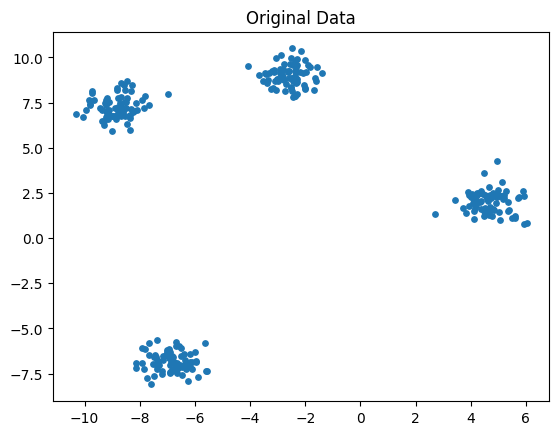

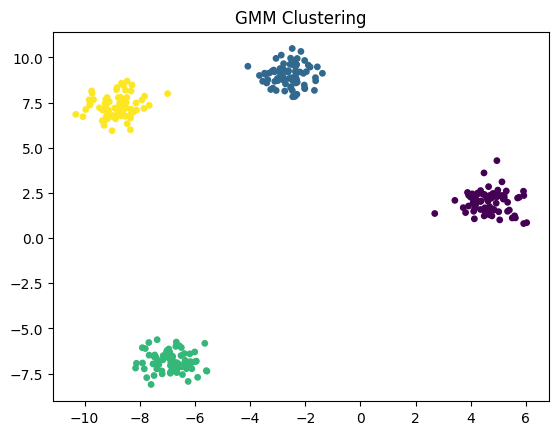

Means:
 [[ 4.68687447  2.01434593]
 [-2.60516878  8.99280115]
 [-6.85126211 -6.85031833]
 [-8.83456141  7.24430734]]

Covariances:
 [[[ 0.38436339 -0.01945793]
  [-0.01945793  0.36510743]]

 [[ 0.27792026  0.0045004 ]
  [ 0.0045004   0.34366106]]

 [[ 0.36397977 -0.02204131]
  [-0.02204131  0.28664297]]

 [[ 0.34176238  0.05252055]
  [ 0.05252055  0.35511404]]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generating synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Scatter plot of the data
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.title("Original Data")
plt.show()

# Fitting a Gaussian Mixture Model
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

# Scatter plot of GMM clustered data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=15)
plt.title("GMM Clustering")
plt.show()

# Printing the learned means and covariances
print("Means:\n", gmm.means_)
print("\nCovariances:\n", gmm.covariances_)

In this example, we use GaussianMixture from the sklearn library to fit a GMM to the data. The GMM assigns a probability for each point to belong to one of the clusters based on the underlying Gaussian distributions.

## Bayesian Networks

![bn](./images/dl3.png)


**Bayess Rule**:

$$P(H_{i}|A) = \frac{P(H_{i})\cdot P(A | H_{i})}{P(A)}$$


Bayesian Networks are probabilistic graphical models that represent a set of variables and their conditional dependencies via a directed acyclic graph (DAG). These models are used to understand probabilistic relationships and generate new data based on the learned structure.


A **Bayesian Network (BN)** is a **probabilistic graphical model** that represents a set of **random variables** and their **conditional dependencies** using a **directed acyclic graph (DAG)**.

- Each **node** represents a **random variable**.
- Each **directed edge** represents a **conditional dependency**.
- The **joint probability distribution (JPD)** is factorized according to the network structure.


A **Bayesian Network** expresses the **joint probability distribution (JPD)** of a set of random variables $ X_1, X_2, ..., X_n $ using the **chain rule of probability**, factoring dependencies based on the network structure:

$$
P(X_1, X_2, ..., X_n) = \prod_{i=1}^{n} P(X_i | \text{Pa}(X_i))
$$

where:
- $ P(X_i | \text{Pa}(X_i)) $ is the **conditional probability** of node $ X_i $ given its **parents** $ \text{Pa}(X_i) $.
- The **DAG structure** ensures that each variable is conditionally independent of its non-descendants given its parents.


Consider a **Bayesian Network** with the following structure:

Cloudy | v Rain -> WetGrass | v Sprinkler


The joint probability distribution (JPD) is factorized as:

$$
P(C, R, S, W) = P(C) P(R | C) P(S | C) P(W | R, S)
$$

where:
- $ C $ = Cloudy
- $ R $ = Rain
- $ S $ = Sprinkler
- $ W $ = Wet Grass

Each conditional probability is specified in **Conditional Probability Tables (CPTs)**.


**Inference in Bayesian Networks**

**1. Marginal Probability**
The probability of a single variable $ X $, obtained by summing (marginalizing) over all other variables:

$$
P(X) = \sum_{Y} P(X, Y)
$$

**2. Conditional Probability**
The probability of $ X $ given $ Y $:

$$
P(X | Y) = \frac{P(X, Y)}{P(Y)}
$$

**3. Bayesian Inference (Bayes' Theorem)**
$$
P(A | B) = \frac{P(B | A) P(A)}{P(B)}
$$

- Used to update beliefs based on evidence.

**4. Exact Inference Methods**
- **Variable Elimination**: Eliminates variables by summing over them.
- **Belief Propagation**: Computes posterior probabilities efficiently.

**5. Approximate Inference Methods**
- **Monte Carlo Methods** (e.g., Gibbs Sampling, Markov Chain Monte Carlo).
- **Variational Inference**.


**Learning Bayesian Networks**
**1. Parameter Learning**
Given a dataset $ D $, estimate **Conditional Probability Tables (CPTs)** using:
- **Maximum Likelihood Estimation (MLE)**:

$$
P(X | Y) = \frac{\text{count}(X, Y)}{\text{count}(Y)}
$$

- **Bayesian Estimation**: Incorporates a prior distribution.

### **2. Structure Learning**
Learning the network structure from data:
- **Score-Based Methods** (e.g., BIC, AIC).
- **Constraint-Based Methods** (e.g., Independence Tests).
- **Hybrid Methods** (combining both).

*Applications*
- **Medical Diagnosis** (e.g., predicting diseases).  
- **Speech Recognition** (e.g., Hidden Markov Models).  
- **Fraud Detection** (e.g., credit card fraud).  
- **Autonomous Systems** (e.g., robot perception).  
- **Natural Language Processing** (e.g., probabilistic parsing).  


In [2]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Defining the structure of the Bayesian Network
model = BayesianNetwork([('Rain', 'Traffic'), ('Accident', 'Traffic')])

# Defining Conditional Probability Distributions (CPDs)
cpd_rain = TabularCPD(variable='Rain', variable_card=2, values=[[0.7], [0.3]])
cpd_accident = TabularCPD(variable='Accident', variable_card=2, values=[[0.9], [0.1]])
cpd_traffic = TabularCPD(variable='Traffic', variable_card=2,
                         values=[[0.9, 0.6, 0.7, 0.1], [0.1, 0.4, 0.3, 0.9]],
                         evidence=['Rain', 'Accident'], evidence_card=[2, 2])

# Adding CPDs to the model
model.add_cpds(cpd_rain, cpd_accident, cpd_traffic)

# Checking if the model is valid
print("Is the model valid? ", model.check_model())

# Performing inference
infer = VariableElimination(model)
prob_traffic = infer.query(variables=['Traffic'], evidence={'Rain': 1, 'Accident': 0})
print(prob_traffic)

Is the model valid?  True
+------------+----------------+
| Traffic    |   phi(Traffic) |
+============+================+
| Traffic(0) |         0.7000 |
+------------+----------------+
| Traffic(1) |         0.3000 |
+------------+----------------+


## Autoencoders

Autoencoders are neural networks designed to learn a compressed representation (encoding) of data. They consist of two parts:

*Encoder*: Maps the input to a compressed latent space.

*Decoder*: Reconstructs the input from the compressed latent representation.

Autoencoders can be used for tasks like denoising, anomaly detection, and data generation. A variant called Variational Autoencoders (VAEs) can generate new data similar to the training data by sampling from the latent space.

![autoencoder](./images/dl2.png)


**Encoder Function**
The encoder maps input data $ \mathbf{x} $ to a lower-dimensional latent representation $ \mathbf{z} $:

$$
\mathbf{z} = f_{\theta}(\mathbf{x})
$$

where:
- $ f_{\theta} $ is the encoder function (usually a neural network).
- $ \mathbf{z} $ is the latent code (compressed representation).

**Decoder Function**
The decoder reconstructs the input from the latent representation:

$$
\hat{\mathbf{x}} = g_{\phi}(\mathbf{z})
$$

where:
- $ g_{\phi} $ is the decoder function.
- $ \hat{\mathbf{x}} $ is the reconstructed input.

**Loss Function (Reconstruction Error)**
Autoencoders are trained by minimizing the difference between the original input $ \mathbf{x} $ and its reconstruction $ \hat{\mathbf{x}} $:

$$
\mathcal{L}(\mathbf{x}, \hat{\mathbf{x}}) = \|\mathbf{x} - \hat{\mathbf{x}}\|^2
$$

This is typically the **Mean Squared Error (MSE)** loss:

$$
\mathcal{L}_{MSE} = \frac{1}{N} \sum_{i=1}^{N} \|\mathbf{x}_i - \hat{\mathbf{x}}_i\|^2
$$

where $ N $ is the number of samples.

*Types of Autoencoders*

 **1. Vanilla Autoencoder**
- Uses simple fully connected layers for encoding and decoding.
- Suitable for small datasets.

 **2. Convolutional Autoencoder (CAE)**
- Uses **convolutional layers** for feature extraction.
- Common in **image processing** applications.

 **3. Denoising Autoencoder (DAE)**
- Learns to remove noise from corrupted inputs.
- Uses a modified loss function:

$$
\mathcal{L}_{DAE} = \|\mathbf{x} - g_{\phi}(f_{\theta}(\tilde{\mathbf{x}}))\|^2
$$

where $ \tilde{\mathbf{x}} $ is the noisy version of $ \mathbf{x} $.

 **4. Sparse Autoencoder**
- Encourages sparsity in the latent space by adding a sparsity constraint $ \Omega(\mathbf{z}) $:

$$
\mathcal{L}_{Sparse} = \|\mathbf{x} - \hat{\mathbf{x}}\|^2 + \lambda \Omega(\mathbf{z})
$$

where $ \Omega(\mathbf{z}) $ is typically **KL divergence** for enforcing sparsity:

$$
\Omega(\mathbf{z}) = \sum_{j} \rho \log \frac{\rho}{\hat{\rho}_j} + (1 - \rho) \log \frac{1 - \rho}{1 - \hat{\rho}_j}
$$

where:
- $ \hat{\rho}_j $ is the average activation of the latent neuron $ j $.
- $ \rho $ is the sparsity parameter.
- $ \lambda $ controls the sparsity penalty.

 **5. Variational Autoencoder (VAE)**
- Uses probabilistic modeling in the latent space.
- The encoder learns a distribution:

  $$
  q_{\theta}(\mathbf{z} | \mathbf{x})
  $$

- Instead of learning a single latent code, it learns **mean** and **variance**:

  $$
  \mathbf{z} \sim \mathcal{N}(\mu, \sigma^2)
  $$

- The **VAE loss function** includes **reconstruction loss** + **KL divergence**:

  $$
  \mathcal{L}_{VAE} = \mathbb{E}_{q_{\theta}(\mathbf{z} | \mathbf{x})} \left[ -\log p_{\phi}(\mathbf{x} | \mathbf{z}) \right] + D_{KL}(q_{\theta}(\mathbf{z} | \mathbf{x}) \parallel p(\mathbf{z}))
  $$

where $ D_{KL} $ regularizes the latent space to follow a prior distribution.


*Training Process*
1. **Feed input $ \mathbf{x} $ into the encoder**:  
   - Computes latent representation $ \mathbf{z} = f_{\theta}(\mathbf{x}) $.
2. **Pass $ \mathbf{z} $ to the decoder**:  
   - Generates reconstructed output $ \hat{\mathbf{x}} = g_{\phi}(\mathbf{z}) $.
3. **Compute reconstruction loss**:  
   - Compare $ \hat{\mathbf{x}} $ with original $ \mathbf{x} $.
4. **Backpropagate and update parameters $ \theta $, $ \phi $**:  
   - Optimize encoder-decoder weights using **gradient descent**.


*Applications of Autoencoders*
- Dimensionality Reduction (like PCA but nonlinear).  
- Denoising Images and Data.  
- Anomaly Detection (e.g., fraud detection).  
- Feature Extraction (pretrained autoencoders for deep learning).  
- Generative Models (VAE, GANs).  

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 70ms/step - loss: 0.3786 - val_loss: 0.1051
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.1001 - val_loss: 0.0876
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - loss: 0.0870 - val_loss: 0.0832
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0833 - val_loss: 0.0806
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 49ms/step - loss: 0.0810 - val_loss: 0.0788
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


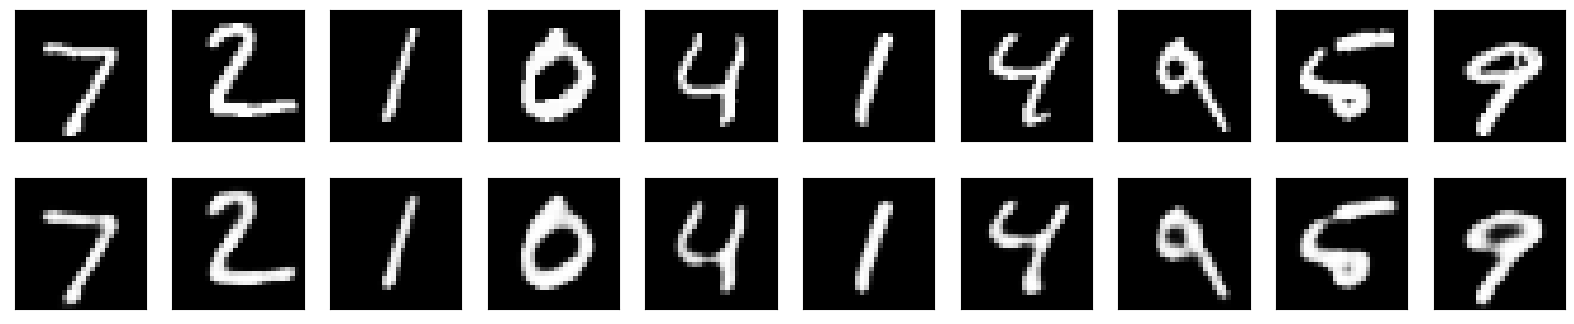

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

# Loading the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Defining the Autoencoder model
input_img = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder model
autoencoder = tf.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Training the autoencoder
autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Visualizing the results
decoded_imgs = autoencoder.predict(x_test[:10])

plt.figure(figsize=(20, 4))
for i in range(10):
    # Display original images
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Generative Adversarial Networks (GANs)

Architecture of GANs (Generator and Discriminator): Generative Adversarial Networks (GANs) consist of two neural networks, the Generator and the Discriminator, which are trained simultaneously through adversarial learning.

*Generator*: Generates fake data from a random noise vector.

*Discriminator*: Attempts to distinguish between real data and the fake data produced by the Generator.

The objective of the Generator is to produce data that is indistinguishable from real data, while the Discriminator tries to correctly identify whether the data is real or generated. The competition between these two models drives both to improve.

GAN Architecture

*Generator*: Takes a random noise vector (usually sampled from a Gaussian distribution) as input and produces a synthetic image.

*Discriminator*: A binary classifier that tries to differentiate between real and fake images.

**Applications of GANs**:
- Image generation (e.g., generating human faces, artwork, etc.)
- Data augmentation for small datasets.
- Super-resolution (enhancing the resolution of images).
- Style transfer (e.g., converting an image into the style of a famous painter).


Generative Adversarial Networks (GANs) consist of two neural networks:  

- **Generator** $G $: Tries to generate realistic data from random noise.  
- **Discriminator** $ D $: Tries to distinguish real data from fake (generated) data.  

These networks compete in a **minimax game** where $ G $ learns to fool $ D $, and $ D $ learns to become a better classifier.

The generator takes a latent variable $ \mathbf{z} \sim p_z(\mathbf{z}) $ (typically sampled from a normal distribution) and maps it to the data space:

$$ G_{\theta_G}(\mathbf{z})$$

where $ \theta_G $ are the parameters of the generator. The goal of $ G $ is to generate samples that **match the distribution of real data** $ p_{data}(\mathbf{x}) $.

The discriminator takes an input $ \mathbf{x} $ (either real or generated) and outputs a probability $ D_{\theta_D}(\mathbf{x}) $ that represents how likely $ \mathbf{x} $ is from the real dataset:

$$D_{\theta_D}(\mathbf{x}) \in [0,1] $$

where $ \theta_D $ are the parameters of the discriminator.

The **discriminator** is trained to maximize the probability of assigning the correct labels to both real and fake data:

$$
\mathbb{E}_{\mathbf{x} \sim p_{data}(\mathbf{x})} [\log D_{\theta_D}(\mathbf{x})] + \mathbb{E}_{\mathbf{z} \sim p_z(\mathbf{z})} [\log (1 - D_{\theta_D}(G_{\theta_G}(\mathbf{z})))]
$$

The **generator** is trained to **fool** the discriminator, meaning it tries to minimize:

$$
\mathbb{E}_{\mathbf{z} \sim p_z(\mathbf{z})} [\log (1 - D_{\theta_D}(G_{\theta_G}(\mathbf{z})))]
$$

Thus, the GAN optimization problem becomes:

$$
\min_G \max_D V(G, D)
$$

where the **value function** is:

$$
V(G, D) = \mathbb{E}_{\mathbf{x} \sim p_{data}(\mathbf{x})} [\log D(\mathbf{x})] + \mathbb{E}_{\mathbf{z} \sim p_z(\mathbf{z})} [\log (1 - D(G(\mathbf{z})))]
$$

*Training Process:*

1. **Update $ D $**: Maximize $ \log D(\mathbf{x}) + \log (1 - D(G(\mathbf{z}))) $  
   - This improves the discriminator's ability to distinguish real from fake samples.
2. **Update $ G $**: Minimize $\log (1 - D(G(\mathbf{z}))) $  
   - This forces $ G $ to generate more realistic data.

**Alternative Generator Loss (to avoid vanishing gradients)**:  

Instead of minimizing $\log (1 - D(G(\mathbf{z}))) $, we maximize $ \log D(G(\mathbf{z})) $, which leads to better gradient updates:

$$
\max_G \mathbb{E}_{\mathbf{z} \sim p_z(\mathbf{z})} [\log D(G(\mathbf{z}))]
$$


**Mode Collapse**: Sometimes, $G $ learns to generate only a few types of outputs instead of covering the full data distribution.

**Solutions:**
- **Wasserstein GAN (WGAN)**: Uses Earth Mover’s Distance instead of KL divergence for a more stable training:

  $$
  W(p_{data}, p_G) = \inf_{\gamma \in \Pi(p_{data}, p_G)} \mathbb{E}_{(x, y) \sim \gamma} [ \| x - y \| ]
  $$

- **Gradient Penalty (WGAN-GP)**: Enforces smoothness in $ D $:

  $$
  \lambda (\| \nabla D(\hat{x}) \|_2 - 1)^2
  $$


100%|██████████| 9.91M/9.91M [00:02<00:00, 3.55MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 224kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 1.87MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 470kB/s]


Epoch [1/50], d_loss: 0.0002903046552091837, g_loss: 11.334090232849121
Epoch [2/50], d_loss: 0.016408471390604973, g_loss: 5.930357456207275
Epoch [3/50], d_loss: 1.1196818351745605, g_loss: 9.830656051635742
Epoch [4/50], d_loss: 0.33959275484085083, g_loss: 2.2070369720458984
Epoch [5/50], d_loss: 0.16863034665584564, g_loss: 6.665189743041992
Epoch [6/50], d_loss: 0.2914535105228424, g_loss: 6.750110626220703
Epoch [7/50], d_loss: 0.06188296154141426, g_loss: 10.545310974121094
Epoch [8/50], d_loss: 0.09959034621715546, g_loss: 5.5369977951049805
Epoch [9/50], d_loss: 0.025884652510285378, g_loss: 8.239013671875
Epoch [10/50], d_loss: 0.23798544704914093, g_loss: 12.177473068237305


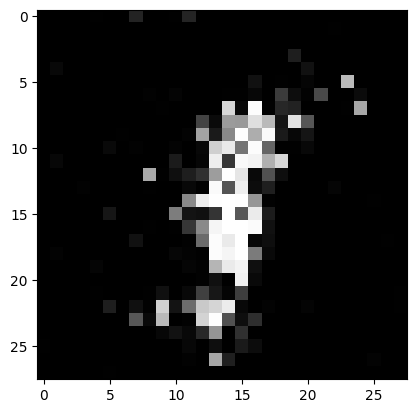

Epoch [11/50], d_loss: 0.27683183550834656, g_loss: 8.987778663635254
Epoch [12/50], d_loss: 0.17859917879104614, g_loss: 5.9541120529174805
Epoch [13/50], d_loss: 0.30824142694473267, g_loss: 7.1443047523498535
Epoch [14/50], d_loss: 0.1761167347431183, g_loss: 7.604856014251709
Epoch [15/50], d_loss: 0.430590957403183, g_loss: 5.58089542388916
Epoch [16/50], d_loss: 0.1598159223794937, g_loss: 4.778195381164551
Epoch [17/50], d_loss: 0.10613278299570084, g_loss: 4.932367324829102
Epoch [18/50], d_loss: 0.2355833351612091, g_loss: 5.310756206512451
Epoch [19/50], d_loss: 0.5999158024787903, g_loss: 7.105936050415039
Epoch [20/50], d_loss: 0.19645383954048157, g_loss: 4.77493953704834


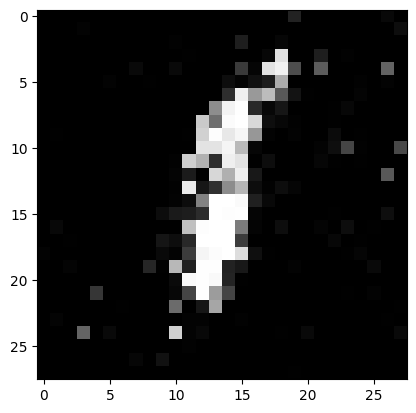

Epoch [21/50], d_loss: 0.41160762310028076, g_loss: 5.339571952819824
Epoch [22/50], d_loss: 0.2435506284236908, g_loss: 4.173476696014404
Epoch [23/50], d_loss: 0.36809849739074707, g_loss: 3.8027329444885254
Epoch [24/50], d_loss: 0.2154611051082611, g_loss: 4.2274580001831055
Epoch [25/50], d_loss: 0.3178003430366516, g_loss: 5.530415058135986
Epoch [26/50], d_loss: 0.2511337995529175, g_loss: 3.915330171585083
Epoch [27/50], d_loss: 0.29228559136390686, g_loss: 2.763357639312744
Epoch [28/50], d_loss: 0.40543922781944275, g_loss: 3.9288907051086426
Epoch [29/50], d_loss: 0.33126533031463623, g_loss: 3.86306095123291
Epoch [30/50], d_loss: 0.39464572072029114, g_loss: 3.0292296409606934


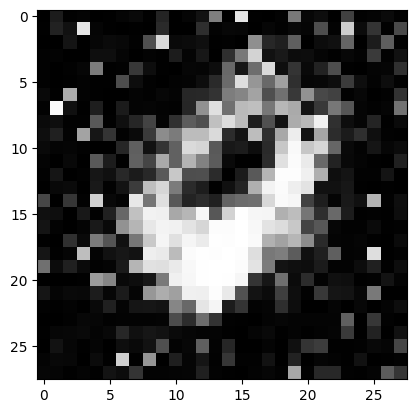

Epoch [31/50], d_loss: 0.34259140491485596, g_loss: 2.7594759464263916
Epoch [32/50], d_loss: 0.4280194640159607, g_loss: 2.815916061401367
Epoch [33/50], d_loss: 0.3461102843284607, g_loss: 2.319420099258423
Epoch [34/50], d_loss: 0.35681360960006714, g_loss: 3.4478163719177246
Epoch [35/50], d_loss: 0.4584572911262512, g_loss: 3.70603084564209
Epoch [36/50], d_loss: 0.6251324415206909, g_loss: 3.4275248050689697
Epoch [37/50], d_loss: 0.5391730070114136, g_loss: 2.5680594444274902
Epoch [38/50], d_loss: 0.7505886554718018, g_loss: 2.974081516265869
Epoch [39/50], d_loss: 0.44351255893707275, g_loss: 2.377638339996338
Epoch [40/50], d_loss: 0.5645801424980164, g_loss: 2.3535420894622803


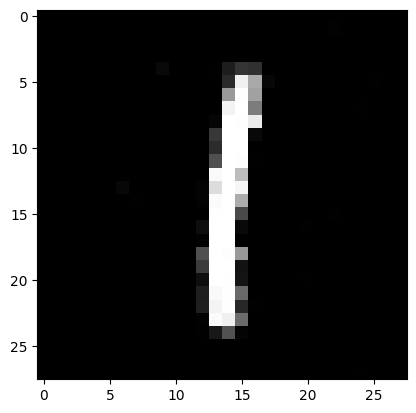

Epoch [41/50], d_loss: 0.7724193334579468, g_loss: 2.360398292541504
Epoch [42/50], d_loss: 0.8005849719047546, g_loss: 1.4686343669891357
Epoch [43/50], d_loss: 0.5525213479995728, g_loss: 1.9239544868469238
Epoch [44/50], d_loss: 0.515824019908905, g_loss: 1.9782299995422363
Epoch [45/50], d_loss: 0.4982108473777771, g_loss: 3.0367794036865234
Epoch [46/50], d_loss: 0.7192264795303345, g_loss: 2.383511781692505
Epoch [47/50], d_loss: 0.60920649766922, g_loss: 1.8508086204528809
Epoch [48/50], d_loss: 0.5864273309707642, g_loss: 2.559847116470337
Epoch [49/50], d_loss: 0.7691986560821533, g_loss: 1.4020874500274658
Epoch [50/50], d_loss: 0.52960604429245, g_loss: 2.6820068359375


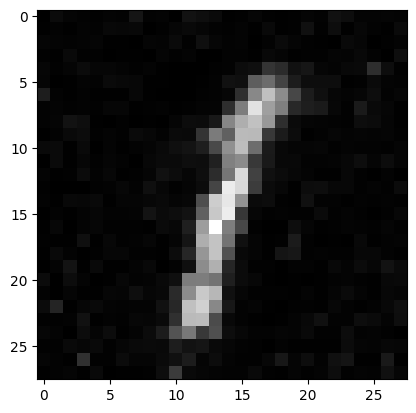

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the Generator
class Generator(nn.Module):
    def __init__(self, input_size, output_size):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, output_size),
            nn.Tanh()
        )

    def forward(self, x):
        return self.fc(x)

# Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_size, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

# Hyperparameters
latent_size = 64
image_size = 28 * 28
batch_size = 100
epochs = 50
learning_rate = 0.0002

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Initialize the models
generator = Generator(latent_size, image_size)
discriminator = Discriminator(image_size)

# Loss and optimizer
criterion = nn.BCELoss()
optimizer_g = optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_d = optim.Adam(discriminator.parameters(), lr=learning_rate)

# Training the GAN
for epoch in range(epochs):
    for real_images, _ in train_loader:
        real_images = real_images.view(batch_size, -1)

        # Train the Discriminator
        optimizer_d.zero_grad()

        # Train with real images
        real_labels = torch.ones(batch_size, 1)
        real_output = discriminator(real_images)
        d_loss_real = criterion(real_output, real_labels)

        # Train with fake images
        noise = torch.randn(batch_size, latent_size)
        fake_images = generator(noise)
        fake_labels = torch.zeros(batch_size, 1)
        fake_output = discriminator(fake_images)
        d_loss_fake = criterion(fake_output, fake_labels)

        # Total Discriminator Loss
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_d.step()

        # Train the Generator
        optimizer_g.zero_grad()
        noise = torch.randn(batch_size, latent_size)
        fake_images = generator(noise)
        fake_output = discriminator(fake_images)
        g_loss = criterion(fake_output, real_labels)
        g_loss.backward()
        optimizer_g.step()

    print(f'Epoch [{epoch+1}/{epochs}], d_loss: {d_loss.item()}, g_loss: {g_loss.item()}')

    # Visualize the generated images after every few epochs
    if (epoch + 1) % 10 == 0:
        fake_images = fake_images.view(fake_images.size(0), 28, 28)
        fake_images = fake_images.detach().numpy()
        plt.imshow(fake_images[0], cmap='gray')
        plt.show()

## Variational Autoencoders (VAEs)

Concept of Latent Space and Probabilistic Generation: Variational Autoencoders (VAEs) are a type of generative model that learns to represent data in a continuous, probabilistic latent space. Unlike regular autoencoders, which map input data to a deterministic latent space, VAEs learn a distribution over the latent space, allowing for more flexible data generation.

The key idea behind VAEs is to train the model to encode the input as a mean and variance vector, representing a Gaussian distribution over the latent space. New data is generated by sampling from this latent distribution.

VAEs assume that observed data $ \mathbf{x} $ is generated from a latent variable $ \mathbf{z} $ through a **decoder network**:

$$p_{\theta}(\mathbf{x}) = \int p_{\theta}(\mathbf{x} \mid \mathbf{z}) p(\mathbf{z}) d\mathbf{z}$$

where:
- $ p(\mathbf{z}) $ is the **prior** (usually $ \mathcal{N}(0, I) $).
- $ p_{\theta}(\mathbf{x} \mid \mathbf{z}) $ is the **likelihood**, parameterized by a neural network.
- $ \theta $ represents the decoder parameters.


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Load Wine dataset
data = load_wine()
X = data['data']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

# Dataset and Dataloader
dataset = TensorDataset(X_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define the VAE model
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        # Encoder
        self.encoder_fc1 = nn.Linear(input_dim, 64)
        self.encoder_fc2 = nn.Linear(64, 32)
        self.fc_mean = nn.Linear(32, latent_dim)
        self.fc_log_var = nn.Linear(32, latent_dim)

        # Decoder
        self.decoder_fc1 = nn.Linear(latent_dim, 32)
        self.decoder_fc2 = nn.Linear(32, 64)
        self.decoder_fc3 = nn.Linear(64, input_dim)

    def encode(self, x):
        h = torch.relu(self.encoder_fc1(x))
        h = torch.relu(self.encoder_fc2(h))
        mean = self.fc_mean(h)
        log_var = self.fc_log_var(h)
        return mean, log_var

    def reparameterize(self, mean, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mean + eps * std

    def decode(self, z):
        h = torch.relu(self.decoder_fc1(z))
        h = torch.relu(self.decoder_fc2(h))
        return torch.sigmoid(self.decoder_fc3(h))

    def forward(self, x):
        mean, log_var = self.encode(x)
        z = self.reparameterize(mean, log_var)
        return self.decode(z), mean, log_var

# Loss function (Reconstruction + KL Divergence)
def vae_loss_function(recon_x, x, mean, log_var):
    recon_loss = nn.MSELoss()(recon_x, x)
    kl_loss = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())
    return recon_loss + kl_loss / x.size(0)

# Hyperparameters
input_dim = X.shape[1]
latent_dim = 2
epochs = 50
learning_rate = 0.001

# Initialize VAE and optimizer
vae = VAE(input_dim=input_dim, latent_dim=latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=learning_rate)

# Training loop
vae.train()
for epoch in range(epochs):
    total_loss = 0
    for batch in dataloader:
        x_batch = batch[0]
        optimizer.zero_grad()
        recon_batch, mean, log_var = vae(x_batch)
        loss = vae_loss_function(recon_batch, x_batch, mean, log_var)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch [{epoch + 1}/{epochs}], Loss: {total_loss / len(dataloader.dataset)}")

# Evaluate reconstruction
vae.eval()
with torch.no_grad():
    sample_data = X_tensor[:10]
    recon_data, _, _ = vae(sample_data)

# Compare original and reconstructed data
print("Original Data:\n", sample_data.numpy())
print("\nReconstructed Data:\n", recon_data.numpy())

Epoch [1/50], Loss: 0.042767418234535816
Epoch [2/50], Loss: 0.04151371221863822
Epoch [3/50], Loss: 0.040848401825079754
Epoch [4/50], Loss: 0.04034029031067752
Epoch [5/50], Loss: 0.03951162032866746
Epoch [6/50], Loss: 0.03865846355309647
Epoch [7/50], Loss: 0.037697460544243284
Epoch [8/50], Loss: 0.036829424038361966
Epoch [9/50], Loss: 0.03576061129570007
Epoch [10/50], Loss: 0.03495544663975748
Epoch [11/50], Loss: 0.03463602534840616
Epoch [12/50], Loss: 0.034647534067711136
Epoch [13/50], Loss: 0.03403889764560742
Epoch [14/50], Loss: 0.03388887509871065
Epoch [15/50], Loss: 0.03430778491363097
Epoch [16/50], Loss: 0.03390583462929458
Epoch [17/50], Loss: 0.0338537036702874
Epoch [18/50], Loss: 0.03351881463875931
Epoch [19/50], Loss: 0.03402071555009049
Epoch [20/50], Loss: 0.033980247344863546
Epoch [21/50], Loss: 0.03369258628802353
Epoch [22/50], Loss: 0.03405394647898299
Epoch [23/50], Loss: 0.03365084461951524
Epoch [24/50], Loss: 0.033335669321960276
Epoch [25/50], Loss